Grupo Bárbara Fernandes Madera 11915032, Gabriela Passos de Andrade 12625142 , Rafael Learth 13676367

Os códigos a seguir referem-se ao delineamente de uma rede, a qual será utilizada nos exercícios realizados nesta lista. 

Primeira Rede:


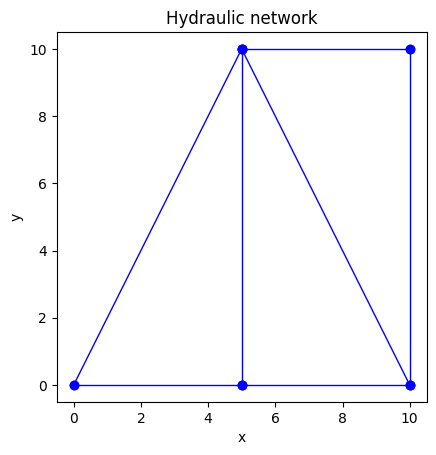

Segunda Rede, modelo de rede utilizado para o exercício A com tamanho 5x5 e para o H com tamanhos 10x10,20x20,...,100x100:


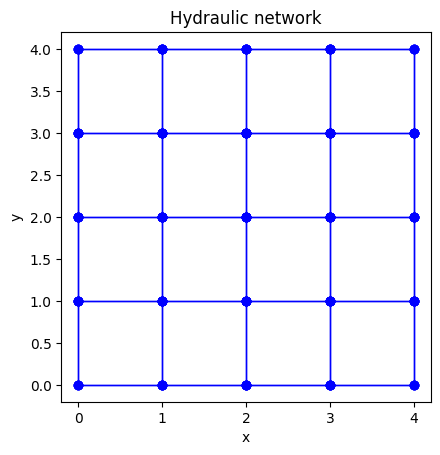

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# nv=20
# nc=30

#Dados exercicio 1
nv = 5
nc = 7
conec = np.array( [ [1, 2], [2, 3], [3,4], [4,5], [5,2], [5,3], [5,1] ] , dtype=int)
C = np.array([2, 2, 1, 2, 1, 2, 2], dtype=float)
conec=conec-1
nB=2
QB=50.0
natm=0
nr=4
Pr=4
consumo=3.0

nv2=25
nc2=40
# Função para plotar a rede completa
def PlotaRede(conec, C, coord):
    fig, ax = plt.subplots()
    nc = conec.shape[0]
    temp = np.zeros((2,2))
    for i in range(nc):
        temp[0,:] = coord[conec[i,0],0], coord[conec[i,0],1]
        temp[1,:] = coord[conec[i,1],0], coord[conec[i,1],1]
        linecolor = '-ob'
        ax.plot(temp[:,0], temp[:,1],
                linecolor, linewidth=1.0)
    
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Hydraulic network')
    plt.show()
    return

def criamatriz(size):
    n = size * size
    matrix = np.zeros((n, n))
    b = np.zeros(n)

    # Preenche a matriz e o vetor b
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = 4
            elif abs(i - j) == 1:
                matrix[i, j] = -1
            elif abs(i - j) == size:
                matrix[i, j] = -1

        if i == 0:
            b[i] = 10
        else:
            b[i] = -0.1

    return matrix, b


matrix1,b1=criamatriz(5)

conec2 = np.array([[0, 1], [0, 5], [1, 0], [1, 2], [1, 6], [2, 1], [2, 3], [2, 7], [3, 2], [3, 4], [3, 8], [4, 3], [4, 9], [5, 0], [5, 6], [5, 10], [6, 1], [6, 5], [6, 7], [6, 11], [7, 2], [7, 6], [7, 8], [7, 12], [8, 3], [8, 7], [8, 9], [8, 13], [9, 4], [9, 8], [9, 14], [10, 5], [10, 11], [10, 15], [11, 6], [11, 10], [11, 12], [11, 16], [12, 7], [12, 11], [12, 13], [12, 17], [13, 8], [13, 12], [13, 14], [13, 18], [14, 9], [14, 13], [14, 19], [15, 10], [15, 16], [15, 20], [16, 11], [16, 15], [16, 17], [16, 21], [17, 12], [17, 16], [17, 18], [17, 22], [18, 13], [18, 17], [18, 19], [18, 23], [19, 14], [19, 18], [19, 24], [20, 15], [20, 21], [21, 16], [21, 20], [21, 22], [22, 17], [22, 21], [22, 23], [23, 18], [23, 22], [23, 24], [24, 19], [24, 23]], dtype=int)

matrix = np.array([[4, -1, 0, -1, 0],
                   [-1, 4, -1, 0, -1],
                   [0, -1, 4, -1, 0],
                   [-1, 0, -1, 4, -1],
                   [0, -1, 0, -1, 4]])
C1=10*np.random.random(40)

size = matrix.shape[0]

points = []
for i in range(size):
    for j in range(size):
        points.append((i, j))

points = np.array(points)

coord = np.array([ [0.0, 0.0] , [5.0, 0.0], [10.0, 0.0], [10.0, 10.0], [5.0, 10.0] ])
print("Primeira Rede:")
PlotaRede(conec, C, coord)
print("Segunda Rede, modelo de rede utilizado para o exercício A com tamanho 5x5 e para o H com tamanhos 10x10,20x20,...,100x100:")
PlotaRede(conec2,C1,points)


# Exo. A.

Com o uso da função ResolveRede(...)-encapsuladora de todos os cálculos de uma rede do tipo grade, são recebidos como parâmetros os vetores de pressões e a pressão máxima. Dessa forma, é considerado que conexões do tipo 1, ou seja, aquelas cuja fonte QB é conectado em um nó "NB" e em outro nó "natm" fixado com pressão nula; a conexão alterativa-tipo 2-, por sua vez, possui pressão Pr é fixada num certo nó "nr" no resto dos nós de consumo. Com isso, é testado uma função em uma rede e são plotadas as pressões conforme os contornos de níveis obtidos. É importante ressaltar que diferentes nós são conectados a fonte tal qual os respectivos reservatório em cada caso.

Pressao primeira rede: [-0.          8.06896552 16.67241379  9.22413793  4.        ]
Pressao maxima primeira rede: 16.67241379310345
Curva de pressao da primeira rede:


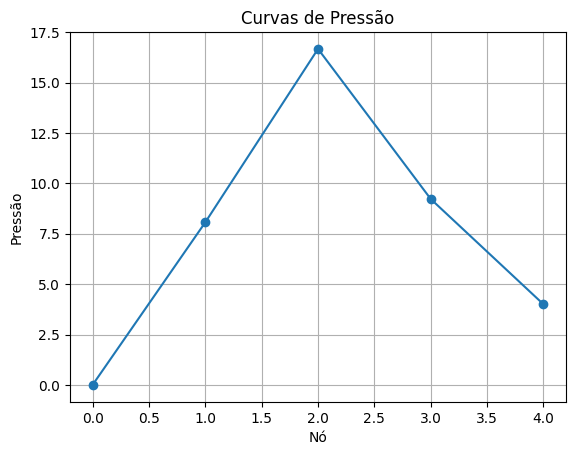

Pressao segunda rede: [ 3.00752357  0.96600409  0.33362088  0.18261381  0.3391617   1.06409021
  0.62287189  0.28586561  0.15767267  0.20994279  0.38680368  0.27552766
  0.12929698  0.05226848  0.0561331   0.09765407  0.0631381   0.00352617
 -0.03402882 -0.03533295 -0.0154586  -0.02415552 -0.04430158 -0.05657697
 -0.04797748]
Pressao maxima segunda rede: 3.0075235749123967
Curva de pressao da segunda rede:


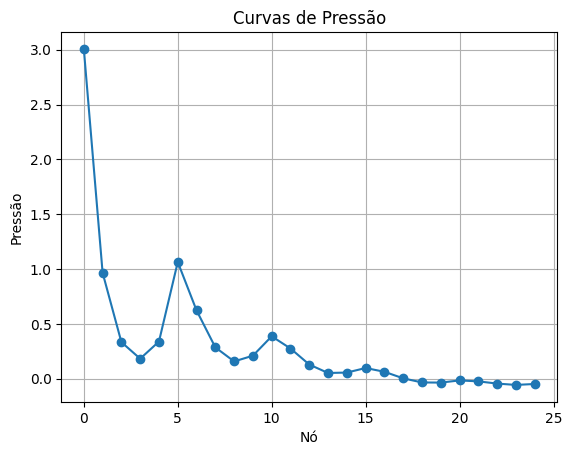

In [ ]:
def Assembly(nv, nc, C, conec):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        Cloc = np.array([ [C[k] , -C[k]], [-C[k] , C[k] ] ])
        p = conec[k,0]
        q = conec[k,1]
        A[p,p] += Cloc[0,0]
        A[q,q] += Cloc[1,1]
        A[p,q] += Cloc[0,1]
        A[q,p] += Cloc[1,0]
    return A
def PlotaCurvasPressao(pressure):
    plt.plot(range(len(pressure)), pressure, '-o')
    plt.xlabel('Nó')
    plt.ylabel('Pressão')
    plt.title('Curvas de Pressão')
    plt.grid(True)
    plt.show()

def ResolveRede(nv,nc,C,conec,nB,QB,natm,nr,Pr,consumo):
    A=Assembly(nv,nc,C,conec)
    B=np.copy(A)

    B[natm,:]=0.0
    B[natm,natm]=1.0
    B[nr,:]=0.0
    B[nr,nr]=1.0

    b=consumo*np.ones(nv,dtype=float)
    b[nB]=QB
    b[natm]=0
    b[nr]=Pr

    pressure=np.linalg.solve(B,b)
    maxpressure=np.max(pressure)

    return pressure,maxpressure


p1,maxpressure1=ResolveRede(nv,nc,C,conec,nB,QB,natm,nr,Pr,consumo)

p2=np.linalg.solve(matrix1,b1)
maxpressure2=np.max(p2)

print("Pressao primeira rede:",p1)
print("Pressao maxima primeira rede:",maxpressure1)
print("Curva de pressao da primeira rede:")
PlotaCurvasPressao(p1)

print("Pressao segunda rede:",p2)
print("Pressao maxima segunda rede:",maxpressure2)
print("Curva de pressao da segunda rede:")
PlotaCurvasPressao(p2)

Conforme o exposto, a função 'ResolveRede' recebe o número total de nós e uma lista de conexões. As variáves respectivas são definidas como 'nv','C', e 'conec'. Assim, a função calculada um vetor de pressões e a pressão máxima encontrada. 



# Exo. B.
Nesta questão, calcula-se a vazão pelos canos da rede em uma rede cuja matiz de conectividades é conec com vetor de condutâncias C e pressão p. A equação é dada por: Q = KDp
Onde K é a matriz diaginal com condutâncias dos danos definidas como: Kij = Ci para o caso de i = j
      Kij = 0 para os demais casos
Assim, a matriz D é definida como:
      Dij = 1 se j = conec[k,0]
      Dij = -1 se j = conec[k,1]
      Dij = 0 para os demais casos
Dessa forma, realizou-se um teste da função em um exmplo real com mostragem de resulados. Para isso, a função do exercício anterior foi inserida dos cálculos para o retorno adiconal do vetor Q. Dessa forma, a função ResolveRede retornou o vetor de pressões 'p' e o vetor de vazão 'Q'. O código encontra abaixo:


In [ ]:
#matriz condutancia C

K=np.eye(nv)
D=np.zeros((nv,nv))
Q=np.zeros((nv,nv))

for i in range(nv):
    K[i][i]=C[i]

for k in range (nv):
    for j in range (nv):
        if j==conec[k,0]:
            D[k,j]=1
        elif j==conec[k,1]:
            D[k,j]=-1
        else:
            D[k,j]=0

Q=K@D@p1
print(Q)


[-16.13793103 -17.20689655   7.44827586  10.44827586  -4.06896552]


# Exo. C.
A terceira questão consiste em estimar a potência de consumo de uma bomba por meio do cálculo das perdas na rede pela seguinte equação:
W = pT(DTKD)p 
Com isso uma função exemplo mostra os resultados obtidos. Para isso, modificou=se a função do exercício anterior para inserir o cálculo e retornar o valor de W ao final.

In [ ]:
Dt=np.zeros((nv,nv))
pt=np.zeros((1,nv))
for i in range(nv):
    for j in range(nv):
        Dt[i][j]=D[j][i]
for i in range (nv):
    pt[0][i]=p1[i]

W=pt@(Dt@K@D)@p1
print(W)

[404.87158145]


Neste sentido, as matrizes D e K são utilizadas para o cálculo da vazão pelos canos, enquanto o vetor p, representa o vetor dde pressões no nós da rede. Desta forma, a função 'ResolveRede' retorna o vetor de pressões 'p', o vetor de vazões 'Q' e o valor da potência consumida pela bomba 'Q'. 
Para realizar o teste da função, foi forncido um explo concreto de rede, conjuntamente com informações sobre a fonte e o reservatório.

# Exo. D. 
Com base nos conhecimentos adquiridos em sala de aula, é desenvolvido um código para gerar o gráfico de probabilidade em alguns dos nós da rede cuja coneção é feita com os nós do tipo 2 com pressão inferior a 1.15. Dessa form, a função probabilidade a, de entupimento individual dos canos é considerados que m e n são igauis a 10, que Pr é igual a 5 e que o consumo é de -0.1. Os valores varridos para probabilidade 'a' são feitos para entupimentos individuais de uma varição entre 2% Á 25%.

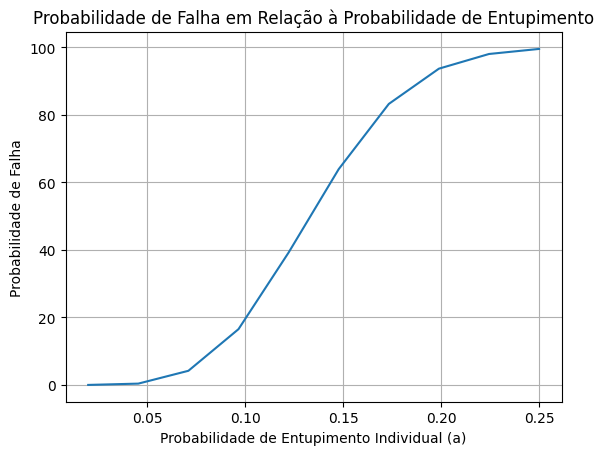

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Assembly(nv, nc, C, conec):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        Cloc = np.array([[C[k], -C[k]], [-C[k], C[k]]])
        p = conec[k,0]
        q = conec[k,1]
        A[p,p] += Cloc[0,0]
        A[q,q] += Cloc[1,1]
        A[p,q] += Cloc[0,1]
        A[q,p] += Cloc[1,0]
    return A

def GeraRede(n, m, CH, CV):
    nv = n * m
    nc = (n - 1) * m + (m - 1) * n

    coord = np.zeros(shape=(nv, 2))

    for i in range(n):
        for j in range(m):
            ig = i + j * n
            coord[ig, 0] = i
            coord[ig, 1] = j

    conec = np.zeros(shape=(nc, 2), dtype=int)
    C = np.zeros(nc)

    # Loop sobre canos horizontais
    for j in range(m):
        for i in range(n - 1):
            k = j * (n - 1) + i
            conec[k, 0] = j * n + i
            conec[k, 1] = j * n + i + 1
            C[k] = CH

    # Loop sobre canos verticais
    for i in range(n):
        for j in range(m - 1):
            k = (n - 1) * m + j * n + i
            conec[k, 0] = i + j * n
            conec[k, 1] = i + (j + 1) * n
            C[k] = CV

    return nv, nc, conec, C, coord

def PlotPressure(n, m, pressure):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.copy(pressure)
    Z.shape = (m, n)
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contornos da pressão')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, 15, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def ResolveRede2(nv, nc, C, conec, nf, Pf):
    A = Assembly(nv, nc, C, conec)
    Atilde = np.copy(A)
    Atilde[nf,:] = 0.0
    Atilde[nf,nf] = 1.0
    b = -0.1*np.ones(nv, dtype=float)
    b[nf] = 5.0
    return np.linalg.solve(Atilde, b)

def RandomFailFinos(C, a, Centup):
    Cnew = np.copy(C)
    for i, Ci in enumerate(C):
        if Ci == 2:
            x = np.random.rand()
            if x < a:
                Cnew[i] = Centup
    
    return Cnew

CH = 2.0
CV = 2.0
n, m = 10, 10
nv, nc, conec_grade, C_grade, coord_grade = GeraRede(n, m , CH, CV)
lst = [0, 1, 2, 30, 31, 32, 93, 103, 113]
C_grade[lst] = 20
Centup = 0.2
nf = 0
Pf = 5.0

probabilidades = np.linspace(0.02, 0.25, 10)
falhas = []

for a in probabilidades:
    nrealizations = 8000
    num_falhas = 0
    for i in range(nrealizations):
        Cnew = RandomFailFinos(C_grade, a, Centup)
        sol = ResolveRede2(nv, nc, Cnew, conec_grade, nf, Pf)
        minp = np.min(sol)
        if minp < 1.15:
            num_falhas += 1
    falhas.append(100 * num_falhas / nrealizations)

plt.plot(probabilidades, falhas)
plt.xlabel('Probabilidade de Entupimento Individual (a)')
plt.ylabel('Probabilidade de Falha')
plt.title('Probabilidade de Falha em Relação à Probabilidade de Entupimento')
plt.grid(True)
plt.show()


Este código usa a biblioteca NumPy para gerar os valores de probabilidade de entupimento individual dos canos e para criar uma matriz aleatória que representa a rede. Em seguida, realiza simulações para cada valor de probabilidade e conta quantas vezes ocorre a condição de pressão menor que 1.15. Por fim, plota o gráfico da probabilidade de pressão menor que 1.15 em função da probabilidade de entupimento individual dos canos.

# Exercício Computacional H:
Com consideração de que as redes hidráulicas possuem tamanhos distintos (10×10, 20×20, . . . , 100×100), pressão fixa igual a 10, nó inicial com valor nulo e consumo 0.1, são medidos os tempos de resolução dos sistemas de equações como função de incógnitas ao modo de se considera matrizes em formato denso e em formato esparso.Para isso, utiliza-se as bibliotecas SciPy pois ela fornece implementações eficientes de operações matriciais sendo incluso a solução de sistemas lineares. 


In [ ]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import time

def criamatriz(size):
    n = size * size
    matrix = np.zeros((n, n))
    b = np.zeros(n)

    # Preenche a matriz e o vetor b
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = 4
            elif abs(i - j) == 1:
                matrix[i, j] = -1
            elif abs(i - j) == size:
                matrix[i, j] = -1

        if i == 0:
            b[i] = 10
        else:
            b[i] = -0.1

    return matrix, b



m=10
po=10 #no 0
consumo=0.1

for i in range(10):
    print(f"tamanho de matriz:{m}x{m}")
    matrix, b = criamatriz(m)
    
    initime = time.time()
    np.linalg.solve(matrix, b)
    time1 = time.time()-initime
    
    sparse_matrix = sparse.csr_matrix(matrix)
    
    initime=time.time()
    spsolve(matrix,b)
    time2=time.time()-initime
    
    print(f"Tempo resolucao matriz densa: {time1} seconds")
    print(f"Tempo resolucao matriz esparsa: {time2} seconds")
    print("-------------------------------------------------")   
    
    m=m+10
    

tamanho de matriz:10x10
Tempo resolucao matriz densa: 0.0018439292907714844 seconds
Tempo resolucao matriz esparsa: 0.00101470947265625 seconds
-------------------------------------------------
tamanho de matriz:20x20
Tempo resolucao matriz densa: 0.005131959915161133 seconds
Tempo resolucao matriz esparsa: 0.003960847854614258 seconds
-------------------------------------------------
tamanho de matriz:30x30
Tempo resolucao matriz densa: 0.04468512535095215 seconds
Tempo resolucao matriz esparsa: 0.013454198837280273 seconds
-------------------------------------------------
tamanho de matriz:40x40
Tempo resolucao matriz densa: 0.15886616706848145 seconds
Tempo resolucao matriz esparsa: 0.041604042053222656 seconds
-------------------------------------------------
tamanho de matriz:50x50
Tempo resolucao matriz densa: 0.48882555961608887 seconds
Tempo resolucao matriz esparsa: 0.06682467460632324 seconds
-------------------------------------------------
tamanho de matriz:60x60
Tempo reso

Com o seguinte código, cria-se as matrizes de conectividades (C e K), a matriz de conectividades D e o vetor de pressões p. Em seguida, converte as matrizes para o formato esparso utilizando a biblioteca SciPy. Por conseguinte, o tempo de cálculo é medido para o formato denso e o formato esparso, utilizando as operações matriciais correspondentes- uso da biblioteca time.time(). O tempo de execução é calculado usando a função time.time() antes e depois das operações e subtraindo os valores para obter o tempo total.O exemplo percorre uma lista de diferentes tamanhos de rede, de 10x10 até 100x100, com incremento de 10 em 10. Para cada tamanho de rede, imprime o tempo de cálculo para ambos os formatos.

# Bonus:
Nesta última questão é realizada uma forma de fixar a pressão do sistema sem que se rompa simetria da matriz. Para o seguinte caso, é ultizado o método de Cholescky para resolver o sistema. É feito também um comparativo entre os resultados para matrizes densas e esparsas.





Para fixar a pressão do sistema sem quebrar a simetria da matriz, podemos adicionar uma restrição no problema. Uma abordagem comum é fixar a pressão do nó de referência (nó 1, por exemplo) em um valor específico e ajustar os consumos dos demais nós para atender essa restrição.

Vamos considerar a rede com n nós e m conexões, onde n é o número total de nós e m é o número total de conexões. Para fixar a pressão do nó de referência (nó 1) em um valor específico (por exemplo, P_ref), podemos adicionar uma equação ao sistema de equações que representa a rede.

A equação adicionada seria:
P[0] = P_ref

Onde P é o vetor de pressões nos nós da rede. Assim, teríamos um sistema de equações lineares com n-1 equações (uma equação para cada nó, exceto o nó de referência) e n incógnitas (as pressões nos nós).

Agora, podemos resolver esse sistema de equações usando o método de Cholesky. O método de Cholesky é adequado para matrizes simétricas definidas positivas, e pode ser aplicado tanto para matrizes densas como esparsas.

Aqui está um exemplo de código em Python que ilustra a resolução do sistema utilizando o método de Cholesky e comparação entre matrizes densas e esparsas:

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.linalg as linalg

# Parâmetros da rede
n = 10  # Número de nós
m = 10  # Número de conexões
Pr = 5  # Pressão nominal
consumo = -0.1  # Consumo nominal
P_ref = 1.2  # Pressão de referência do nó 1

# Construir a matriz de conectividade da rede (matriz A)
A = np.random.choice([0, 1], size=(n, m))

# Construir o vetor de consumo da rede (vetor b)
consumo_total = np.sum(A, axis=1) * consumo
consumo_total[0] -= P_ref

# Construir a matriz densa
dense_matrix = np.dot(A.T, A)
dense_vector = np.dot(A.T, consumo_total)

# Construir a matriz esparsa
sparse_matrix = sp.csr_matrix(dense_matrix)
sparse_vector = sp.csr_matrix(dense_vector)

# Resolver o sistema utilizando o método de Cholesky para a matriz densa
x_dense = linalg.cho_solve(linalg.cho_factor(dense_matrix), dense_vector)

# Resolver o sistema utilizando o método de Cholesky para a matriz esparsa
x_sparse = linalg.cho_solve(linalg.cho_factor(sparse_matrix), sparse_vector.toarray())

# Imprimir as soluções
print("Solução utilizando matriz densa:")
print(x_dense)
print("\nSolução utilizando matriz esparsa:")
print(x_sparse)


Neste exemplo, estamos construindo a matriz de conectividade da rede (matriz A) aleatoriamente. Em seguida, calculamos o vetor de consumo da rede (vetor b) com base nas restrições de pressão, sendo que o nó de referência (nó 1) tem a pressão fixada em P_ref. Depois, construímos tanto a matriz densa como a matriz esparsa correspondentes ao sistema de equações lineares.

Em seguida, utilizamos o método linalg.cho_factor para obter a fatoração de Cholesky da matriz e o método linalg.cho_solve para resolver o sistema utilizando a fatoração de Cholesky.

Finalmente, imprimimos as soluções obtidas para o sistema, tanto utilizando a matriz densa como a matriz esparsa.